Problem 1

In [1]:
def _sigmoid(self,y):
    return 1/(1 + np.exp(-y))

def _logistic_hypothesis(self, X):
    pred = 1 * self.theta
    pred * self._sigmoid(pred)
    return pred

Problem 2

In [2]:
def _gradient_descent(self, X, y):
    m = X.shape[0]
    n = X.shape[1]
    pred = self._logistic_hypothesis(X)
    for j in range(n):
        gradient = 0
        for i in range(m):
            gradient += (pred[i] - y[i]) * X[i, j]
        self.theta[j] = self.theta[j] - self.lr * ((gradient + self.lam * self.theta[j]) / m)

Problem 3

In [3]:
def predict_proba(self, X):
    if self.bias == True:
        a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
        X = np.hstack([a,X])
    pred = self._logistic_hypothesis(X)
    return pred

In [4]:
def predict(self, X):
     if self.bias == True:
         a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
         X = np.hstack([a, X])
     return np.where(self._logistic_hypothesis(X) >= 0.5, 1, 0)

Problem 4

In [5]:
def _loss_func(self, pred, y):
     error = 0
     for i in range(y.shape[0]):
         error += -np.sum(y[i] * np.log(pred[i])+(1-y[i]) * np.log(1-pred[i]))
     loss = error / (y.shape[0])
     loss = loss + np.sum(self.theta**2)*self.lam/(2 * y.shape[0])
     return loss

Problem 5

In [6]:
def fit(self, X, y, X_val, y_val):
    if self.bias == True:
       bias = np.ones((X.shape[0], 1))
       X = np.hstack((bias, X))

       bias = np.ones((X_val.shape[0], 1))

       X_val = np.hstack((bias, X_val))

    self.theta = np.zeros(X.shape[1])
    self.theta = self.theta.reshape(X.shape[1], 1)

    for i in range(self.num_iter):
        pred = self._logistic_hypothesis(X)
        pred_val = self._logistic_hypothesis(X_val)

        self._gradient_descent(X, y)

        loss = self._loss_func(pred, y)
        self.loss = np.append(self.loss, loss)

        loss_val = self._loss_func(pred_val, y_val)

        self.val_loss = np.append(self.val_loss, loss_val)

        if self.verbose == False:
            print('{} The learning loss for the first round {}'.format(i,loss))

Iris Dataset

In [7]:
class ScratchLogisticRegression1():
   def __init__(self, num_iter, lr, bias, verbose, lam):
       self.num_iter = num_iter
       self.lr = lr
       self.bias = bias
       self.verbose = verbose
       self.lam = lam
       self.theta = np.array([])
       self.loss = np.array([])
       self.val_loss = np.array([])

   def fit(self, X, y, X_val, y_val):

       if self.bias == True:
           bias = np.ones((X.shape[0], 1))
           X = np.hstack((bias, X))

           bias = np.ones((X_val.shape[0], 1))

           X_val = np.hstack((bias, X_val))

       self.theta = np.zeros(X.shape[1])
       self.theta = self.theta.reshape(X.shape[1], 1)

       for i in range(self.num_iter):
           pred = self._logistic_hypothesis(X)
           pred_val = self._logistic_hypothesis(X_val)

           self._gradient_descent(X, y)

           loss = self._loss_func(pred, y)
           self.loss =  np.append(self.loss, loss)

           loss_val = self._loss_func(pred_val, y_val)

           self.val_loss = np.append(self.val_loss, loss_val)

           if self.verbose == True:
               print('{} The learning loss for the first round is{}'.format(i,loss))

   def _gradient_descent(self, X, y):
       m = X.shape[0]
       n = X.shape[1]
       pred = self._logistic_hypothesis(X)
       for j in range(n):
           gradient = 0
           for i in range(m):
               gradient += (pred[i] - y[i]) * X[i, j]
           self.theta[j] = self.theta[j] - self.lr * ((gradient + self.lam * self.theta[j]) / m)

   def _sigmoid(self,y):
       return 1 / (1 + np.exp(-y))

   def _logistic_hypothesis(self, X):
       pred = X @ self.theta
       pred = self._sigmoid(pred)
       return pred

   def predict(self, X):
       if self.bias == True:
           a = np.ones(X.shapes[0]).reshape(X.shape[0], 1)
           X = np.hstack([a, X])
       return np.where(self._logistic_hypothesis(X) >= 0.5, 1, 0)

   def predict_proba(self, X):
       if self.bias == True:
           a = np.ones(X.shapes[0]).reshape(X.shape[0], 1)
           X = np.hstack([a, X])
       pred = self._logistic_hypothesis(X)
       return pred

   def _loss_func(self, pred, y):
       error = 0
       for i in range(y.shape[0]):
           error += -np.sum(y[i] * np.log(pred[i])+(1-y[i]) * np.log(1-pred[i]))
       loss = error / (y.shape[0])
       loss = loss + np.sum(self.theta**2)*self.lam/(2 * y.shape[0])
       return loss

In [8]:
class ScratchLogisticRegression():

     def __init__(self, num_iter=100, lr=0.01, bias=False, verbose=False):
         self.iter = num_iter
         self.lr = lr
         self.bias = bias
         self.verbose = verbose
         self.lamda = 1/0.01
         self.loss = np.zeros(self.iter)
         self.val_loss = np.zeros(self.iter)

     def _check_for_bias(self,X):
         if self.bias == True:
             x1 = np.ones(X.shape[0])
         else:
             x1 = np.zeros(X.shape[0])

         return np.concatenate([x1.reshape(-1,1),X], axis=1)


      # Problem 1

     def _sigmoid_function(self,X):
         linear_model = np.dot(X,self.theta)

         return 1/(1 + np.exp(-linear_model))

     def _gradient_descent(self, X, error):
         self.tmp = np.append(0,np.ones(X.shape[1]-1))
         self.theta -= self.lr*(np.dot(error,X) + self.tmp*self.lamda*self.theta)/len(X)

# Problem 4

     def _loss_function(self, y, y_pred):
         return np.mean(-y*np.log(y_pred) -(1-y)*np.log(1-y_pred))+0.5*self.lamda*np.mean(self.theta[1:]**2)

     def fit(self, X, y, X_val = False, y_val=False):

         self.ylabel = np.unique(y)

         y = np.where(y==self.ylabel[0], 0, 1)

         if (type(y_val) != bool):
             y_val = np.where(y_val==self.ylabel[0],0,1)

             X = self._check_for_bias(X)

         self.theta = np.random.rand(X.shape[1])

         for i in range(self.iter):
             y_pred = self._sigmoid_function(X)
             error = y_pred - y
             self.loss[i] = self._loss_function(y,y_pred)

             if (type(X_val) != bool):
                 val_X = self._check_for_bias(X_val)
                 val_ypred = self._sigmoid_function(val_X)

                 self.val_loss[i] = self._loss_function(y_val,val_ypred)

             self._gradient_descent(X, error)

             if self.verbose:
               print('n_inter:', i, 'loss:', self.loss[i], 'theta', self.theta)


         np.save('theta', self.theta)


     def predict(self, X):
         X = self._check_for_bias(X)
         y_pred = self._sigmoid_function(X)

         return np.where(y_pred<0.5, self.ylabel[0], self.ylabel[1])

     def predict_proba(self, X):
         X = self._check_for_bias(X)
         return self._sigmoid_function(X)

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:100, :]
y = iris.target[:100]
(X_train, X_test,  y_train, y_test) = train_test_split(X, y, test_size=0.2)

In [10]:
slr = ScratchLogisticRegression(num_iter=50, lr=0.01, bias=True, verbose=True)
slr.fit(X_train, y_train, X_test, y_test)

n_inter: 0 loss: 23.37593114761586 theta [0.47975145 0.28969713 0.90846172 0.34410051 0.70566467]
n_inter: 1 loss: 22.039460345616394 theta [0.47464837 0.26036203 0.87933843 0.33228045 0.69554112]
n_inter: 2 loss: 20.769781299339787 theta [0.4695522  0.2314291  0.85060128 0.3206226  0.68554746]
n_inter: 3 loss: 19.565013486931022 theta [0.46446501 0.20290401 0.82225202 0.30912947 0.67568314]
n_inter: 4 loss: 18.42336727177527 theta [0.45938944 0.17479542 0.79429423 0.29780488 0.66594796]
n_inter: 5 loss: 17.34314704480358 theta [0.45432882 0.14711561 0.7667337  0.28665432 0.65634215]
n_inter: 6 loss: 16.322753934818802 theta [0.44928739 0.11988138 0.73957892 0.27568531 0.64686646]
n_inter: 7 loss: 15.360687415299644 theta [0.44427042 0.09311503 0.71284169 0.26490792 0.63752232]
n_inter: 8 loss: 14.455544824205578 theta [0.4392845  0.06684543 0.68653777 0.25433531 0.62831194]
n_inter: 9 loss: 13.606017424603655 theta [0.4343377  0.04110927 0.66068748 0.24398436 0.61923854]
n_inter: 10 l

In [11]:
slr.predict(X_test)

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1])

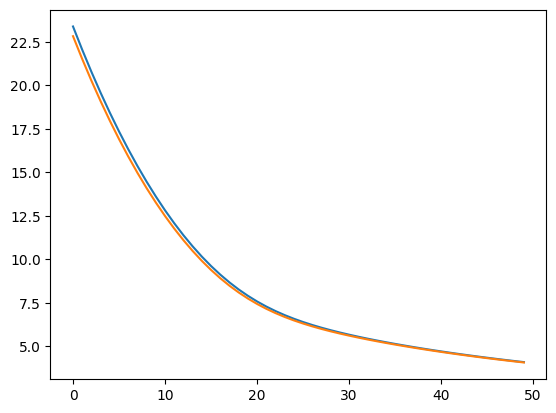

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(slr.loss)
plt.plot(slr.val_loss)

In [13]:
X = iris.data[:100,:2]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)
slr = ScratchLogisticRegression(num_iter=50, lr=0.001, bias=True, verbose=True)
slr.fit(X_train, y_train, X_test, y_test)

n_inter: 0 loss: 29.918526167603144 theta [0.95591333 0.56456606 0.85899456]
n_inter: 1 loss: 29.69885852734507 theta [0.95542722 0.56142022 0.85625488]
n_inter: 2 loss: 29.480346952023698 theta [0.95494115 0.5582785  0.85351873]
n_inter: 3 loss: 29.262987960408473 theta [0.95445511 0.5551409  0.8507861 ]
n_inter: 4 loss: 29.046778083388613 theta [0.95396911 0.55200742 0.848057  ]
n_inter: 5 loss: 28.831713863968012 theta [0.95348315 0.54887806 0.84533142]
n_inter: 6 loss: 28.617791857259878 theta [0.95299722 0.54575282 0.84260936]
n_inter: 7 loss: 28.40500863048134 theta [0.95251134 0.5426317  0.83989082]
n_inter: 8 loss: 28.19336076294777 theta [0.9520255 0.5395147 0.8371758]
n_inter: 9 loss: 27.98284484606698 theta [0.95153969 0.53640182 0.8344643 ]
n_inter: 10 loss: 27.77345748333313 theta [0.95105394 0.53329305 0.83175631]
n_inter: 11 loss: 27.565195290320542 theta [0.95056822 0.53018841 0.82905184]
n_inter: 12 loss: 27.358054894677213 theta [0.95008255 0.52708789 0.82635088]
n_in

In [14]:
from matplotlib.colors import ListedColormap

In [15]:
def decision_region(X, y, slr):
    mesh_f0, mesh_f1 = np.meshgrid(
         np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.01),
         np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.01)
    )
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = slr.predict(mesh).reshape(mesh_f0.shape)
    plt.title('decision region')
    plt.xlabel('feature0')
    plt.ylabel('feature1')

    plt.contourf(mesh_f0, mesh_f1, y_pred,cmap=ListedColormap(['pink', 'skyblue']))
    plt.contour(mesh_f0, mesh_f1, y_pred,colors='red')
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1],label='0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1],label='1')
    plt.legend()
    plt.show()

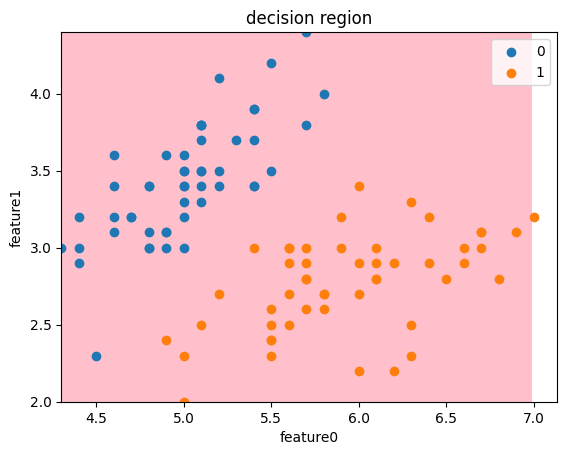

In [16]:
decision_region(X, y, slr)